In [12]:
# Markov Chain Monte Carlo -- Metropolis-Hastings
import numpy as np
from scipy.stats import beta, norm, uniform, binom
import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('ggplot')

# data
visits = 1058
hits = 52
likelihood =  binom
prior =  beta(2, 2)

# Algorithm parameters
niter = 10000
samples = np.zeros(niter + 1)
theta = float(hits) / visits
samples[0] = theta
naccepted = 0.0

for i in range(niter):
    # sample candidate from proposal distribution
    theta_candidate = theta + norm(0, 0.3).rvs()

    # compute acceptance rate
    alpha = likelihood(visits, theta_candidate).logpmf(hits) + prior.logpdf(theta_candidate)
    alpha -=  likelihood(visits, theta).logpmf(hits) + prior.logpdf(theta)
    
    # test if candidate will be accepted
    if uniform.rvs(0, 1) < np.exp(alpha):
        theta = theta_candidate
        naccepted += 1
    
    # store sample
    samples[i + 1] = theta
    
print('--- SUMMARY ---')
print('Acceptance ratio =', naccepted / niter)
print('Mean sample = ', samples.mean())
print('STD sample = ', samples.std())

--- SUMMARY ---
Acceptance ratio = 0.0308
Mean sample =  0.051476459731
STD sample =  0.00651225542306


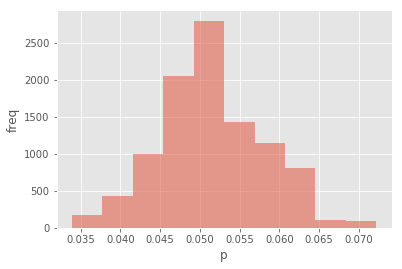

In [13]:
plt.hist(samples, alpha=0.5)
plt.xlabel('p')
plt.ylabel('freq')